# Data quality
In this notebook we analyze the data quality refered to COVID19 in Mexico. This information in obtained thought the Secretariat of Health and published by *Dirección General de Epidemiología* the mexican CDC. https://www.gob.mx/salud/documentos/datos-abiertos-152127. 

In [1]:

import glob
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

import datetime
from IPython.display import Markdown as md

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import json

%matplotlib 

Using matplotlib backend: MacOSX


In [2]:
dic_ENTIDADES = d2 = json.load(open("../src/diccionario_datos_covid19/ENTIDADES.jsn"))
dic_MUNICIPIOS = d2 = json.load(open("../src/diccionario_datos_covid19/MUNICIPIOS.jsn"))
dic_NACIONALIDAD = d2 = json.load(open("../src/diccionario_datos_covid19/NACIONALIDAD.jsn"))
dic_ORIGEN = d2 = json.load(open("../src/diccionario_datos_covid19/ORIGEN.jsn"))
dic_RESULTADO = d2 = json.load(open("../src/diccionario_datos_covid19/RESULTADO.jsn"))
dic_SECTOR = d2 = json.load(open("../src/diccionario_datos_covid19/SECTOR.jsn"))
dic_SEXO = d2 = json.load(open("../src/diccionario_datos_covid19/SEXO.jsn"))
dic_SI_NO = d2 = json.load(open("../src/diccionario_datos_covid19/SI_NO.jsn"))
dic_TIPO_PACIENTE = d2 = json.load(open("../src/diccionario_datos_covid19/TIPO_PACIENTE.jsn"))

## Load data

In [ ]:

# load the csv from the src folder
strpath = '../src/'
m = []
i =0
if not os.path.isfile('fulldb1.csv'):
    for filename in glob.glob(strpath+"*"):
        if filename.find('.csv')>0:
            date = '20'+filename[7:9] +'-' + filename[11:13] +'-' +filename[13:15]
            #print(date)
            df = pd.read_csv(filename, encoding = "ISO-8859-1",dtype =str)
            df['FechaRegistro'] = date
            df['MUNICIPIO']= df['ENTIDAD_RES'] + df['MUNICIPIO_RES']
            df.FECHA_INGRESO = pd.to_datetime(df['FECHA_INGRESO'],)
            df.replace({'ORIGEN':dic_ORIGEN},inplace=True)
            df.replace({"SECTOR": dic_SECTOR},inplace=True)
            df.replace({"ENTIDAD_UM": dic_ENTIDADES},inplace=True)
            df.replace({"SEXO": dic_SEXO},inplace=True)
            df.replace({"ENTIDAD_NAC": dic_ENTIDADES},inplace=True)
            df.replace({"ENTIDAD_RES": dic_ENTIDADES},inplace=True)
            df.replace({"MUNICIPIO": dic_MUNICIPIOS},inplace=True)
            df['MUNICIPIO_RES']= df['MUNICIPIO']
            df.replace({"TIPO_PACIENTE": dic_TIPO_PACIENTE},inplace=True)
            df.replace({'INTUBADO': dic_SI_NO},inplace=True)
            df.replace({'NEUMONIA': dic_SI_NO},inplace=True)
            df.replace({'NACIONALIDAD': dic_NACIONALIDAD},inplace=True)
            df.replace({'EMBARAZO': dic_SI_NO},inplace=True)
            df.replace({'HABLA_LENGUA_INDIG': dic_SI_NO},inplace=True)
            df.replace({'DIABETES': dic_SI_NO},inplace=True)
            df.replace({'EPOC': dic_SI_NO},inplace=True)
            df.replace({'ASMA': dic_SI_NO},inplace=True)
            df.replace({'INMUSUPR': dic_SI_NO},inplace=True)
            df.replace({'HIPERTENSION': dic_SI_NO},inplace=True)
            df.replace({'OTRA_COM': dic_SI_NO},inplace=True)
            df.replace({'CARDIOVASCULAR': dic_SI_NO},inplace=True)
            df.replace({'OBESIDAD': dic_SI_NO},inplace=True)
            df.replace({'RENAL_CRONICA': dic_SI_NO},inplace=True)
            df.replace({'TABAQUISMO': dic_SI_NO},inplace=True)
            df.replace({'OTRO_CASO': dic_SI_NO},inplace=True)
            df.replace({'RESULTADO': dic_RESULTADO},inplace=True)
            df.replace({'MIGRANTE': dic_SI_NO},inplace=True)
            df.replace({'UCI': dic_SI_NO},inplace=True)
            if i== 0:
                df0=df.copy()
                i=1
            else:
                frame = [df0,df]
                df0 = pd.concat(frame)
            del df
else:
    df0 = pd.read_csv('fulldb.csv')
    df0.FechaRegistro = pd.to_datetime(df0['FechaRegistro'], format='%Y-%m-%d')
    lastdateRecord = df0.FechaRegistro.max()
    deltaT = datetime.datetime.now() - lastdateRecord
    for i in range(1,deltaT.days+1) :
        filename = (lastdateRecord + datetime.timedelta(days=1)).strftime("%Y%m%d")+'.csv'
        df = pd.read_csv(strpath+filename, encoding = "ISO-8859-1",dtype =str)
        df['FechaRegistro'] = (lastdateRecord + datetime.timedelta(days=1)).strftime("%Y-%m-%d")
        df.FECHA_INGRESO = pd.to_datetime(df['FECHA_INGRESO'],)

len(df0)

In [ ]:
df0.head()

In [8]:
df0.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,FechaRegistro,MUNICIPIO
274389,2020-07-07,03c6b2,FUERA DE USMER,IMSS,MÉXICO,MUJER,MÉXICO,MÉXICO,METEPEC,AMBULATORIO,...,NO,NO,NO ESPECIFICADO,No positivo SARS-CoV-2,NO ESPECIFICADO,MÃ©xico,99,NO APLICA,2020-07-07,METEPEC
445705,2020-07-07,022b24,FUERA DE USMER,SSA,SAN LUIS POTOSÍ,HOMBRE,SAN LUIS POTOSÍ,SAN LUIS POTOSÍ,SANTA MARÍA DEL RÍO,AMBULATORIO,...,NO,NO,SI,No positivo SARS-CoV-2,NO ESPECIFICADO,MÃ©xico,99,NO APLICA,2020-07-07,SANTA MARÍA DEL RÍO
445687,2020-07-07,152143,USMER,PRIVADA,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,ÁLVARO OBREGÓN,AMBULATORIO,...,NO,NO,NO,No positivo SARS-CoV-2,NO ESPECIFICADO,MÃ©xico,99,NO APLICA,2020-07-07,ÁLVARO OBREGÓN
445688,2020-07-07,0da56d,USMER,IMSS,COAHUILA DE ZARAGOZA,MUJER,COAHUILA DE ZARAGOZA,COAHUILA DE ZARAGOZA,SALTILLO,AMBULATORIO,...,NO,NO,NO ESPECIFICADO,No positivo SARS-CoV-2,NO ESPECIFICADO,MÃ©xico,99,NO APLICA,2020-07-07,SALTILLO
445689,2020-07-07,07b6d1,USMER,IMSS,COAHUILA DE ZARAGOZA,MUJER,COAHUILA DE ZARAGOZA,COAHUILA DE ZARAGOZA,MONCLOVA,HOSPITALIZADO,...,NO,NO,NO ESPECIFICADO,No positivo SARS-CoV-2,NO ESPECIFICADO,MÃ©xico,99,NO,2020-07-07,MONCLOVA


In [9]:
# we sorted the value by 
df0 = df0.sort_values(by='FechaRegistro', ascending=False)
df0.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,FechaRegistro,MUNICIPIO
274389,2020-07-07,03c6b2,FUERA DE USMER,IMSS,MÉXICO,MUJER,MÉXICO,MÉXICO,METEPEC,AMBULATORIO,...,NO,NO,NO ESPECIFICADO,No positivo SARS-CoV-2,NO ESPECIFICADO,MÃ©xico,99,NO APLICA,2020-07-07,METEPEC
14,2020-07-07,02a6eb,FUERA DE USMER,IMSS,CIUDAD DE MÉXICO,HOMBRE,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,TLÁHUAC,HOSPITALIZADO,...,NO,NO,NO ESPECIFICADO,Positivo SARS-CoV-2,NO ESPECIFICADO,MÃ©xico,99,NO,2020-07-07,TLÁHUAC
19,2020-07-07,12e203,FUERA DE USMER,IMSS,CIUDAD DE MÉXICO,MUJER,MÉXICO,MÉXICO,NAUCALPAN DE JUÁREZ,HOSPITALIZADO,...,NO,NO,NO ESPECIFICADO,Positivo SARS-CoV-2,NO ESPECIFICADO,MÃ©xico,99,NO,2020-07-07,NAUCALPAN DE JUÁREZ
18,2020-07-07,13d0bd,FUERA DE USMER,IMSS,QUINTANA ROO,MUJER,YUCATÁN,QUINTANA ROO,BENITO JUÁREZ,AMBULATORIO,...,NO,NO,NO ESPECIFICADO,Positivo SARS-CoV-2,NO ESPECIFICADO,MÃ©xico,99,NO APLICA,2020-07-07,BENITO JUÁREZ
17,2020-07-07,0552db,FUERA DE USMER,IMSS,GUANAJUATO,HOMBRE,GUANAJUATO,GUANAJUATO,GUANAJUATO,HOSPITALIZADO,...,NO,NO,NO ESPECIFICADO,Positivo SARS-CoV-2,NO ESPECIFICADO,MÃ©xico,99,NO,2020-07-07,GUANAJUATO


In [10]:
md("We have {0} records of covid evolution cases in Mexico until today {1}".format(df0.shape[0], datetime.datetime.now()) )


We have 23508808 records of covid evolution cases in Mexico until today 2020-07-08 17:45:25.064576

In [11]:
df0.FechaRegistro = pd.to_datetime(df0['FechaRegistro'], format='%Y-%m-%d')

In [12]:
#today = (datetime.datetime.now()).strftime("%Y%m%d")
today = (datetime.datetime.now() - datetime.timedelta(days=1)).strftime("%Y%m%d")
yesterday = (datetime.datetime.now() - datetime.timedelta(days=2)).strftime("%Y%m%d")
ereyesterday = (datetime.datetime.now() - datetime.timedelta(days=3)).strftime("%Y%m%d")
df= pd.read_csv( '../src/'+today       +'.csv', encoding = "ISO-8859-1",dtype =str)
dfA= pd.read_csv('../src/'+yesterday   +'.csv', encoding = "ISO-8859-1",dtype =str)
dfB= pd.read_csv('../src/'+ereyesterday+'.csv', encoding = "ISO-8859-1",dtype =str)

## 1 How many cases we have in the last report vs db?

In [13]:
# we get unique cases globaly and from the last csv 
global_ids = df0.ID_REGISTRO.unique().tolist()
last_ids  = df.ID_REGISTRO.unique().tolist()
# we get the cases that are present in previous reports but they doesn't show in the last report
untracket_cases = set(global_ids)- set(last_ids)
tracket_cases = set(last_ids)

In [14]:
df0.FECHA_SINTOMAS = pd.to_datetime(df0['FECHA_SINTOMAS'], format ='%Y-%m-%d')

In [130]:
# we extract the records that does not exist in the last report
df1 = df0[df0.ID_REGISTRO.isin(untracket_cases)]
df1 = df1.copy()

md("we have {0} register that are not tracket".format(df1.ID_REGISTRO.nunique()) )

we have 26225 register that are not tracket

1. How many days the records exist
2. Is there some kind or relation between the records?

In [131]:
df1.FECHA_SINTOMAS = pd.to_datetime(df1['FECHA_SINTOMAS'], format ='%Y-%m-%d')
df1.FECHA_ACTUALIZACION = pd.to_datetime(df1['FECHA_ACTUALIZACION'], format ='%Y-%m-%d')
df1.FechaRegistro = pd.to_datetime(df1['FechaRegistro'], format ='%Y-%m-%d')


In [132]:
# we get the duration of cases between records
df1['LastDay']  = df1.groupby('ID_REGISTRO')['FechaRegistro'].transform('max')
df1['FirstDay'] = df1.groupby('ID_REGISTRO')['FechaRegistro'].transform('min')
df1['Duration'] = (df1.LastDay - df1.FirstDay).dt.days

In [133]:
# We keep only one case to get plot correctly the cases
df3 = df1.drop_duplicates(keep='first')
df3 = df3.drop_duplicates('ID_REGISTRO',keep='first')
df_3 = df3.groupby(['RESULTADO','Duration'])['Duration'].count().to_frame(name = 'count').reset_index()
# sns.lineplot(x='Duration', y='count', data=df_3, hue='RESULTADO');

In [134]:
len(df1[df1.Duration!=0].drop_duplicates(['ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI']))

33606

In [135]:
len(df1)

278427

In [136]:
len(df1[df1.Duration!=0])

276791

In [137]:
df1.ID_REGISTRO.nunique()

26225

In [128]:
df1R = df1[df1.Duration!=0].drop_duplicates(['ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'])

In [129]:
df1R.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,FechaRegistro,MUNICIPIO,LastDay,FirstDay,Duration
246916,2020-07-06,10175b,USMER,IMSS,VERACRUZ DE IGNACIO DE LA LLAVE,HOMBRE,VERACRUZ DE IGNACIO DE LA LLAVE,VERACRUZ DE IGNACIO DE LA LLAVE,COATZACOALCOS,AMBULATORIO,...,Positivo SARS-CoV-2,NO ESPECIFICADO,MÃ©xico,99,NO APLICA,2020-07-06,COATZACOALCOS,2020-07-06,2020-07-01,5
629528,2020-07-06,078f2e,USMER,IMSS,NUEVO LEÓN,HOMBRE,NUEVO LEÓN,NUEVO LEÓN,SAN NICOLÁS DE LOS GARZA,HOSPITALIZADO,...,Resultado pendiente,NO ESPECIFICADO,MÃ©xico,99,NO,2020-07-06,SAN NICOLÁS DE LOS GARZA,2020-07-06,2020-06-27,9
622259,2020-07-06,19a5f7,FUERA DE USMER,ISSSTE,CIUDAD DE MÉXICO,HOMBRE,QUERÉTARO,MÉXICO,NAUCALPAN DE JUÁREZ,HOSPITALIZADO,...,Resultado pendiente,NO ESPECIFICADO,MÃ©xico,99,NO,2020-07-06,NAUCALPAN DE JUÁREZ,2020-07-06,2020-06-18,18
622318,2020-07-06,14f085,USMER,SSA,MÉXICO,MUJER,MÉXICO,MÉXICO,CUAUTITLÁN IZCALLI,HOSPITALIZADO,...,Resultado pendiente,NO ESPECIFICADO,MÃ©xico,99,NO,2020-07-06,CUAUTITLÁN IZCALLI,2020-07-06,2020-06-30,6
619937,2020-07-06,02d8ee,USMER,SSA,MÉXICO,MUJER,MÉXICO,MÉXICO,TOLUCA,HOSPITALIZADO,...,Resultado pendiente,NO ESPECIFICADO,MÃ©xico,99,NO,2020-07-06,TOLUCA,2020-07-06,2020-07-01,5


In [109]:
df1[df1.Duration==0].drop_duplicates(['ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI']).head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,FechaRegistro,MUNICIPIO,LastDay,FirstDay,Duration
649786,2020-07-06,19a5ec,FUERA DE USMER,IMSS,JALISCO,MUJER,JALISCO,JALISCO,ZAPOTLÁN EL GRANDE,AMBULATORIO,...,Resultado pendiente,NO ESPECIFICADO,MÃ©xico,99,NO APLICA,2020-07-06,ZAPOTLÁN EL GRANDE,2020-07-06,2020-07-06,0
602689,2020-07-06,1c22a0,USMER,IMSS,MICHOACÁN DE OCAMPO,MUJER,CHIAPAS,MICHOACÁN DE OCAMPO,LÁZARO CÁRDENAS,HOSPITALIZADO,...,Resultado pendiente,NO ESPECIFICADO,MÃ©xico,99,NO,2020-07-06,LÁZARO CÁRDENAS,2020-07-06,2020-07-06,0
644832,2020-07-06,191189,USMER,SSA,BAJA CALIFORNIA,HOMBRE,BAJA CALIFORNIA,BAJA CALIFORNIA,MEXICALI,HOSPITALIZADO,...,Resultado pendiente,NO ESPECIFICADO,MÃ©xico,99,NO,2020-07-06,MEXICALI,2020-07-06,2020-07-06,0
642418,2020-07-06,17ec15,USMER,SSA,PUEBLA,HOMBRE,PUEBLA,PUEBLA,ATLIXCO,AMBULATORIO,...,Resultado pendiente,NO ESPECIFICADO,MÃ©xico,99,NO APLICA,2020-07-06,ATLIXCO,2020-07-06,2020-07-06,0
112937,2020-07-06,1288df,FUERA DE USMER,IMSS,VERACRUZ DE IGNACIO DE LA LLAVE,HOMBRE,VERACRUZ DE IGNACIO DE LA LLAVE,VERACRUZ DE IGNACIO DE LA LLAVE,VERACRUZ,AMBULATORIO,...,Positivo SARS-CoV-2,NO ESPECIFICADO,MÃ©xico,99,NO APLICA,2020-07-06,VERACRUZ,2020-07-06,2020-07-06,0


In [115]:
df1[df1.ID_REGISTRO=='1288df']

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,FechaRegistro,MUNICIPIO,LastDay,FirstDay,Duration
112937,2020-07-06,1288df,FUERA DE USMER,IMSS,VERACRUZ DE IGNACIO DE LA LLAVE,HOMBRE,VERACRUZ DE IGNACIO DE LA LLAVE,VERACRUZ DE IGNACIO DE LA LLAVE,VERACRUZ,AMBULATORIO,...,Positivo SARS-CoV-2,NO ESPECIFICADO,MÃ©xico,99,NO APLICA,2020-07-06,VERACRUZ,2020-07-06,2020-07-06,0


In [138]:
df3.shape[0]-df3[df3.Duration==0].shape[0]

24589

In [152]:
df_3.head(30)

,Duration,count
0,0,1636
1,1,1495
2,2,1581
3,3,1651
4,4,3520
5,5,1757
6,6,1594
7,7,1941
8,8,2741
9,9,818


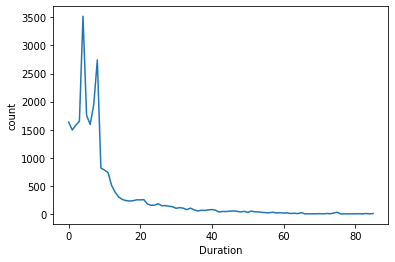

In [148]:
df_3 = df3.groupby(['Duration'])['Duration'].count().to_frame(name = 'count').reset_index()
sns.lineplot(x='Duration',y='count',  data=df_3[['Duration','count']],)#, palette=sns.color_palette("Set1", 3))

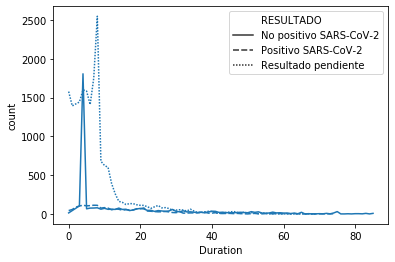

In [20]:
sns.lineplot(x='Duration', y='count', data=df_3, style='RESULTADO')#, palette=sns.color_palette("Set1", 3))

In [21]:
df3['EDAD_int'] = df3.EDAD.astype(int)

In [90]:
df3.groupby(['RESULTADO','Duration'])['Duration'].count().sort_values(by='FechaRegistro', ascending=False)#.to_frame(name = 'count').reset_index()

RESULTADO               Duration
No positivo SARS-CoV-2  0             14
                        1             44
                        2             74
                        3            105
                        4           1807
                                    ... 
Resultado pendiente     60             1
                        61             1
                        63             1
                        65             2
                        69             1
Name: Duration, Length: 219, dtype: int64

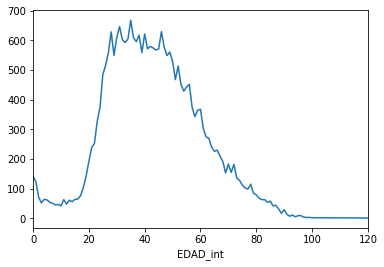

In [22]:
df3.groupby('EDAD_int')['EDAD_int'].count().plot()

In [23]:
df1.FechaRegistro = pd.to_datetime(df1['FechaRegistro'], format='%Y-%m-%d')
df1 = df1.sort_values(by='FechaRegistro', ascending=False)

In [37]:
df3.shape

(26225, 40)

In [26]:
print(len(df1))
df3 = df1.drop_duplicates(keep='first')
# print(len(df3))
df3 = df3.drop_duplicates('ID_REGISTRO',keep='first')
# print(len(df3))
print(len(df1))

278427
278427


In [27]:
df3.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI', 'FechaRegistro', 'MUNICIPIO', 'LastDay',
       'FirstDay', 'Duration'],
      dtype='object')

In [28]:
df3.groupby(['ORIGEN'])['ORIGEN'].count().sort_values(ascending=False).head(19)

ORIGEN
FUERA DE USMER    17356
USMER              8869
Name: ORIGEN, dtype: int64

In [38]:
df3.groupby('SECTOR')['SECTOR'].count().sort_values( ascending=False)

SECTOR
SSA                13477
IMSS                8514
PRIVADA             1897
ISSSTE               816
ESTATAL              657
NO ESPECIFICADO      184
SEDENA               180
SEMAR                169
PEMEX                152
MUNICIPAL            117
UNIVERSITARIO         37
IMSS-BIENESTAR        20
CRUZ ROJA              4
DIF                    1
Name: SECTOR, dtype: int64

In [34]:
df3.groupby('ENTIDAD_UM')['ENTIDAD_UM'].count().sort_values( ascending=False)

ENTIDAD_UM
CIUDAD DE MÉXICO                   5626
MÉXICO                             5093
JALISCO                            1485
NUEVO LEÓN                         1450
BAJA CALIFORNIA                    1035
SINALOA                            1023
VERACRUZ DE IGNACIO DE LA LLAVE     978
COAHUILA DE ZARAGOZA                901
TABASCO                             854
MICHOACÁN DE OCAMPO                 663
CHIHUAHUA                           652
PUEBLA                              587
OAXACA                              584
GUANAJUATO                          564
SONORA                              490
CHIAPAS                             460
QUINTANA ROO                        440
TAMAULIPAS                          439
GUERRERO                            434
MORELOS                             363
YUCATÁN                             330
BAJA CALIFORNIA SUR                 274
AGUASCALIENTES                      250
QUERÉTARO                           222
HIDALGO                      

In [39]:
df3.groupby('SEXO')['SEXO'].count().sort_values( ascending=False)

SEXO
HOMBRE    13659
MUJER     12566
Name: SEXO, dtype: int64

In [41]:
df3.groupby('ENTIDAD_NAC')['ENTIDAD_NAC'].count().sort_values( ascending=False)

ENTIDAD_NAC
MÉXICO                             4760
CIUDAD DE MÉXICO                   4454
VERACRUZ DE IGNACIO DE LA LLAVE    1320
JALISCO                            1303
NUEVO LEÓN                         1224
NO ESPECIFICADO                    1203
SINALOA                            1133
COAHUILA DE ZARAGOZA                884
TABASCO                             823
OAXACA                              806
MICHOACÁN DE OCAMPO                 749
GUERRERO                            711
PUEBLA                              700
GUANAJUATO                          623
BAJA CALIFORNIA                     582
CHIAPAS                             565
CHIHUAHUA                           538
SONORA                              494
TAMAULIPAS                          469
YUCATÁN                             366
MORELOS                             330
HIDALGO                             309
DURANGO                             279
SAN LUIS POTOSÍ                     223
AGUASCALIENTES              

In [29]:
df3.groupby('ENTIDAD_NAC')['ENTIDAD_NAC'].count().sort_values( ascending=False)

SECTOR
CRUZ ROJA              4
DIF                    1
ESTATAL              657
IMSS                8514
IMSS-BIENESTAR        20
ISSSTE               816
MUNICIPAL            117
NO ESPECIFICADO      184
PEMEX                152
PRIVADA             1897
SEDENA               180
SEMAR                169
SSA                13477
UNIVERSITARIO         37
Name: SECTOR, dtype: int64

In [42]:
df3.groupby('ENTIDAD_RES')['ENTIDAD_RES'].count().sort_values( ascending=False)

ENTIDAD_RES
MÉXICO                             5835
CIUDAD DE MÉXICO                   4746
JALISCO                            1452
NUEVO LEÓN                         1440
SINALOA                            1021
BAJA CALIFORNIA                    1014
VERACRUZ DE IGNACIO DE LA LLAVE     997
COAHUILA DE ZARAGOZA                874
TABASCO                             852
MICHOACÁN DE OCAMPO                 666
CHIHUAHUA                           660
OAXACA                              590
PUEBLA                              589
GUANAJUATO                          573
SONORA                              516
CHIAPAS                             471
GUERRERO                            461
QUINTANA ROO                        442
TAMAULIPAS                          437
MORELOS                             383
YUCATÁN                             332
HIDALGO                             274
BAJA CALIFORNIA SUR                 272
AGUASCALIENTES                      246
DURANGO                     

In [44]:
df3.groupby('MUNICIPIO_RES')['MUNICIPIO_RES'].count().sort_values( ascending=False)

MUNICIPIO_RES
IZTAPALAPA                   1001
CULIACÁN                      594
NEZAHUALCÓYOTL                587
ECATEPEC DE MORELOS           584
GUSTAVO A. MADERO             540
                             ... 
DEL NAYAR                       1
SAN FRANCISCO TETLANOHCAN       1
SAN FRANCISCO SOLA              1
DOCTOR COSS                     1
ÁNIMAS TRUJANO                  1
Name: MUNICIPIO_RES, Length: 1089, dtype: int64

In [45]:
df3.groupby('TIPO_PACIENTE')['TIPO_PACIENTE'].count()

TIPO_PACIENTE
AMBULATORIO      19171
HOSPITALIZADO     7054
Name: TIPO_PACIENTE, dtype: int64

In [52]:
df3.groupby('INTUBADO')['INTUBADO'].count().sort_values( ascending=False)

INTUBADO
NO APLICA          19171
NO                  6570
SI                   478
NO ESPECIFICADO        6
Name: INTUBADO, dtype: int64

In [53]:
df3.groupby('NEUMONIA')['NEUMONIA'].count().sort_values( ascending=False)

NEUMONIA
NO     21372
SI      4853
Name: NEUMONIA, dtype: int64

In [56]:
df3.groupby('EDAD')['EDAD'].count().sort_values( ascending=False)

EDAD
35     668
31     647
46     630
28     629
40     622
      ... 
98       3
99       3
101      2
100      2
120      1
Name: EDAD, Length: 103, dtype: int64

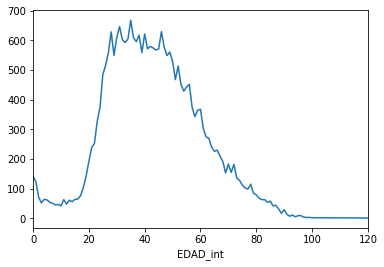

In [62]:
df3['EDAD_int'] = df3.EDAD.astype(int)
df3.groupby('EDAD_int')['EDAD_int'].count().plot()

In [64]:
df3.shape

(26225, 41)

In [66]:
df3.groupby('EMBARAZO')['EMBARAZO'].count().sort_values( ascending=False)

EMBARAZO
NO APLICA    13659
NO           12338
SI             179
SE IGNORA       49
Name: EMBARAZO, dtype: int64

In [67]:
df3.groupby('HABLA_LENGUA_INDIG')['HABLA_LENGUA_INDIG'].count().sort_values( ascending=False)

HABLA_LENGUA_INDIG
NO                 25312
NO ESPECIFICADO      648
SI                   265
Name: HABLA_LENGUA_INDIG, dtype: int64

In [68]:
df3.groupby('DIABETES')['DIABETES'].count().sort_values( ascending=False)

DIABETES
NO           22451
SI            3615
SE IGNORA      159
Name: DIABETES, dtype: int64

In [69]:
df3.groupby('ASMA')['ASMA'].count().sort_values( ascending=False)

ASMA
NO           25172
SI             912
SE IGNORA      141
Name: ASMA, dtype: int64

In [70]:
df3.groupby('INMUSUPR')['INMUSUPR'].count().sort_values( ascending=False)

INMUSUPR
NO           25586
SI             482
SE IGNORA      157
Name: INMUSUPR, dtype: int64

In [71]:
df3.groupby('HIPERTENSION')['HIPERTENSION'].count().sort_values( ascending=False)

HIPERTENSION
NO           21529
SI            4548
SE IGNORA      148
Name: HIPERTENSION, dtype: int64

In [73]:
df3.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI', 'FechaRegistro', 'MUNICIPIO', 'LastDay',
       'FirstDay', 'Duration', 'EDAD_int'],
      dtype='object')

In [74]:
df3.groupby('OTRA_COM')['OTRA_COM'].count().sort_values( ascending=False)

OTRA_COM
NO           24999
SI             992
SE IGNORA      234
Name: OTRA_COM, dtype: int64

In [75]:
df3.groupby('CARDIOVASCULAR')['CARDIOVASCULAR'].count().sort_values( ascending=False)

CARDIOVASCULAR
NO           25389
SI             680
SE IGNORA      156
Name: CARDIOVASCULAR, dtype: int64

In [76]:
df3.groupby('OBESIDAD')['OBESIDAD'].count().sort_values( ascending=False)

OBESIDAD
NO           21912
SI            4174
SE IGNORA      139
Name: OBESIDAD, dtype: int64

In [77]:
df3.groupby('RENAL_CRONICA')['RENAL_CRONICA'].count().sort_values( ascending=False)

RENAL_CRONICA
NO           25447
SI             633
SE IGNORA      145
Name: RENAL_CRONICA, dtype: int64

In [78]:
df3.groupby('TABAQUISMO')['TABAQUISMO'].count().sort_values( ascending=False)

TABAQUISMO
NO           23861
SI            2220
SE IGNORA      144
Name: TABAQUISMO, dtype: int64

In [79]:
df3.groupby('OTRO_CASO')['OTRO_CASO'].count().sort_values( ascending=False)

OTRO_CASO
NO                 9289
NO ESPECIFICADO    8615
SI                 8321
Name: OTRO_CASO, dtype: int64

In [80]:
df3.groupby('RESULTADO')['RESULTADO'].count().sort_values( ascending=False)

RESULTADO
Resultado pendiente       19656
No positivo SARS-CoV-2     4331
Positivo SARS-CoV-2        2238
Name: RESULTADO, dtype: int64

In [81]:
df3.groupby('MIGRANTE')['MIGRANTE'].count().sort_values( ascending=False)

MIGRANTE
NO ESPECIFICADO    26132
NO                    65
SI                    28
Name: MIGRANTE, dtype: int64

In [82]:
df3.groupby('PAIS_NACIONALIDAD')['PAIS_NACIONALIDAD'].count().sort_values( ascending=False)

PAIS_NACIONALIDAD
MÃ©xico                        24549
99                              1335
México                           142
Estados Unidos de AmÃ©rica        53
EspaÃ±a                           17
Colombia                          16
Brasil                            15
Cuba                               9
Argentina                          8
CanadÃ¡                            8
Venezuela                          8
Italia                             6
Francia                            6
El Salvador                        5
Bolivia                            5
PerÃº                              4
Guatemala                          4
RepÃºblica de Honduras             4
Nicaragua                          4
JapÃ³n                             3
Macao                              3
China                              2
Otro                               2
Madeira                            1
Austria                            1
Australia                          1
Rusia               

In [83]:
df3.groupby('PAIS_ORIGEN')['PAIS_ORIGEN'].count().sort_values( ascending=False)

PAIS_ORIGEN
99                           20921
97                            5276
Estados Unidos de América        9
Italia                           3
El Salvador                      3
Cuba                             3
Venezuela                        1
República de Honduras            1
Otro                             1
Nicaragua                        1
Francia                          1
Ecuador                          1
Colombia                         1
China                            1
Brasil                           1
Argentina                        1
Name: PAIS_ORIGEN, dtype: int64

In [84]:
df3.groupby('PAIS_ORIGEN')['PAIS_ORIGEN'].count().sort_values( ascending=False)

PAIS_ORIGEN
99                           20921
97                            5276
Estados Unidos de América        9
Italia                           3
El Salvador                      3
Cuba                             3
Venezuela                        1
República de Honduras            1
Otro                             1
Nicaragua                        1
Francia                          1
Ecuador                          1
Colombia                         1
China                            1
Brasil                           1
Argentina                        1
Name: PAIS_ORIGEN, dtype: int64

In [85]:
df3.groupby('UCI')['UCI'].count().sort_values( ascending=False)

UCI
NO APLICA          19171
NO                  6477
SI                   571
NO ESPECIFICADO        6
Name: UCI, dtype: int64

In [ ]:
df3.groupby('EDAD')['EDAD'].count().sort_values( ascending=False)

# personas que siguen en el sistema

In [153]:
# we extract the records that does not live in the last report
dfO1 = df0[df0.ID_REGISTRO.isin(tracket_cases)]
dfO1 = dfO1.copy()
dfO1.shape


(23230381, 37)

In [155]:
dfO1.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI', 'FechaRegistro', 'MUNICIPIO'],
      dtype='object')

In [ ]:
dfO1['LastDay']  = dfO1.groupby('ID_REGISTRO')['FechaRegistro'].transform('max')
dfO1['FirstDay'] = dfO1.groupby('ID_REGISTRO')['FechaRegistro'].transform('min')
dfO1['Duration'] = (dfO1.LastDay - df1.FirstDay).dt.days
dfO1['numRecords']  = dfO1.groupby('ID_REGISTRO')['FechaRegistro'].transform('count')
# dfO1['numRecords']  = dfO1.groupby('ID_REGISTRO')['FechaRegistro'].transform('min')

In [ ]:
dfO1['DurationRecords'] = dfO1['Duration'] - dfO1['numRecords']

In [ ]:
# df0.FechaRegistro = pd.to_datetime(df0['FechaRegistro'], format='%Y-%m-%d')
dfO1.FECHA_SINTOMAS = pd.to_datetime(dfO1['FECHA_SINTOMAS'], format ='%Y-%m-%d')
dfO1.FECHA_ACTUALIZACION = pd.to_datetime(dfO1['FECHA_ACTUALIZACION'], format ='%Y-%m-%d')
dfO1.FechaRegistro = pd.to_datetime(dfO1['FechaRegistro'], format ='%Y-%m-%d')
dfO1['delta_lastRecord'] = (dfO1.FECHA_ACTUALIZACION-dfO1.FechaRegistro ).dt.days
dfO1['deltaReporte'] = (dfO1.FechaRegistro-dfO1.FECHA_SINTOMAS).dt.days
dfO1[dfO1.FECHA_SINTOMAS<'2020-02-29'].groupby('RESULTADO')['RESULTADO'].count()



In [ ]:
# sort_values(by='FechaRegistro', ascending=False).head()

dfO13 = dfO1.drop_duplicates(['ID_REGISTRO', 
       'FECHA_INGRESO', 'FECHA_SINTOMAS', ],keep='first')
dfO13 = dfO13.copy()

In [ ]:
dfO13.groupby('ID_REGISTRO')['FECHA_ACTUALIZACION'].count().sort_values( ascending=False)

In [ ]:
dfO131 = dfO13[dfO13.FECHA_SINTOMAS<'2020-02-29']
dfO131.groupby('ID_REGISTRO')['FECHA_ACTUALIZACION'].count().sort_values( ascending=False).head(10)

In [ ]:
dfO131[dfO131.ID_REGISTRO.isin(['0304ae','02a0df','0226ad','13fb66','0632c1','1732a3',])][['ID_REGISTRO', 
        'FECHA_SINTOMAS','FECHA_INGRESO',]].sort_values(['ID_REGISTRO','FECHA_SINTOMAS'], ascending=False)

In [ ]:
dfO131['deltaCorrección'] = (dfO131.FECHA_INGRESO-dfO131.FECHA_SINTOMAS).dt.days

In [ ]:
df0['FECHA_SINTOMAS'].min()

In [ ]:
df0[df0['FECHA_SINTOMAS']=='2020-01-01']

In [ ]:
first= pd.read_csv( '../src/'+'20200412'       +'.csv', encoding = "ISO-8859-1",dtype =str)


In [ ]:
first.FECHA_SINTOMAS = pd.to_datetime(first['FECHA_SINTOMAS'], format ='%Y-%m-%d')

In [ ]:
first.FECHA_SINTOMAS.min()

At the end of 2019, the world saw the born of the Sars-cov-2 virus which genereate a disease called COVID19 (COrona VIrus disease). The high risk that we face with this virus is that the sympthons are related to a typical flu but generate a high damage un the lungs decreasing the oxygen level. The disminution of oxygen generate a high demand of intensive beds.

From WHO files

According to the WHO the incubation period for COVID-19, is on average 5-6 days, but can be extended to 14 days. However there some evidence that shows that exist different types of transmition, such as symptomatic, pre-symptomatic and a symptomatic.

The typical transmition is the symptomatic, this ocurrs when a person shown COVID symptomatic and can spread the virus conciently or inconciently respiratory droplest over thier enviroment. However, some cases has shown that a person can transmit COVID-19 without symptoms, (3 or 2 days) before present the typical symptoms. Finally there are some concern about the asyptomatic transmission according to the WHO: Asymptomatic transmission refers to transmission of the virus from a person, who does not develop symptoms. There are few reports of laboratory-confirmed cases who are truly asymptomatic, and to date, there has been no documente asymptomatic transmission. This does not exclude the possibility that it may occur. Asymptomatic cases have been reported as part of contact tracing efforts in some countries. Source https://www.who.int/docs/default-source/coronaviruse/situation-reports/20200402-sitrep-73-covid-19.pdf?sfvrsn=5ae25bc7_2#:~:text=An%20asymptomatic%20laboratory%2Dconfirmed,more%20information%20becomes%20available.


The goal of this notebook is listed below:
* Understand the evolution of the covi19 in Mexico, there are a rate of 10% of deads though a visualization analysis


Key elements

* Incubation period can be expresed a GAMMA.
* Is most common the transmision after show symptoms.
* How we can modeled (explain pre-symtomatic transmition)
* how we can modeled asyntomatic transmition


In [ ]:
df.head()

In [ ]:
df

In [ ]:
dic_ORIGEN

In [ ]:
for each in dic_ORIGEN:
    dic_ORIGEN[each]= dic_ORIGEN[each][0]

dic_ORIGEN
dic_NACIONALIDAD
dic_SEXO
dic_SI_NO
dic_TIPO_PACIENTE
dic_SECTOR
dic_RESULTADO

In [ ]:
dic_NACIONALIDAD
dic_ORIGEN
dic_RESULTADO
dic_SECTOR
dic_SEXO
dic_SI_NO
dic_TIPO_PACIENTE

In [ ]:
dic_ENTIDADES = d2 = json.load(open("../src/diccionario_datos_covid19/ENTIDADES.jsn"))
dic_MUNICIPIOS = d2 = json.load(open("../src/diccionario_datos_covid19/MUNICIPIOS.jsn"))
dic_NACIONALIDAD = d2 = json.load(open("../src/diccionario_datos_covid19/NACIONALIDAD.jsn"))
dic_ORIGEN = d2 = json.load(open("../src/diccionario_datos_covid19/ORIGEN.jsn"))
dic_RESULTADO = d2 = json.load(open("../src/diccionario_datos_covid19/RESULTADO.jsn"))
dic_SECTOR = d2 = json.load(open("../src/diccionario_datos_covid19/SECTOR.jsn"))
dic_SEXO = d2 = json.load(open("../src/diccionario_datos_covid19/SEXO.jsn"))
dic_SI_NO = d2 = json.load(open("../src/diccionario_datos_covid19/SI_NO.jsn"))
dic_TIPO_PACIENTE = d2 = json.load(open("../src/diccionario_datos_covid19/TIPO_PACIENTE.jsn"))